In [1]:
!pip install econml

# Task-1

In [2]:
#Import Necessary Libraries

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from econml.metalearners import TLearner, SLearner, XLearner, DomainAdaptationLearner
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
# !pip install scipy

In [4]:
#Task-1 : Load, clean, and explore the datasets provided (IHDP and JOBS)
data = np.load('ihdp.npz')


In [5]:
data.files


['x', 't', 'yf', 'ycf', 'ite']

In [6]:
for f_data in data.files:
    print(f'{f_data}: {data[f_data].shape}')
    #print(f'{f_data}:{datajobs[f_data].shape}')

x: (747, 25)
t: (747, 1)
yf: (747, 1)
ycf: (747, 1)
ite: (747, 1)


In [7]:
x = data['x'].reshape(-1, 1)
t = data['t'].reshape(-1, 1)
yf = data['yf'].reshape(-1, 1)
ycf = data['ycf'].reshape(-1,1)
ite = data['ite'].reshape(-1,1)

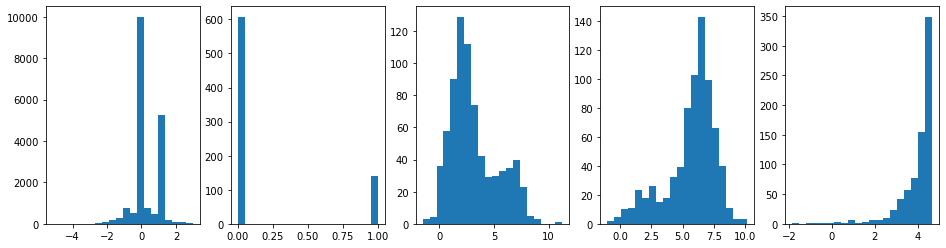

In [8]:
bins=20
fig, axes = plt.subplots(1, 5, figsize=(16, 4))
axes[0].hist(x, bins=bins)
axes[1].hist(t, bins=bins)
axes[2].hist(yf, bins=bins)
axes[3].hist(ycf, bins=bins)
axes[4].hist(ite, bins=bins)
plt.show()

In [9]:
#Average Mean Values 

print('X:',np.mean(x))
print('T:',np.mean(t))
print('YF:',np.mean(yf))
print('YCF:',np.mean(ycf))
print('ITE:',np.mean(ite))

X: 0.2532262382864792
T: 0.18607764390896922
YF: 3.1595375238575967
YCF: 5.696106550309938
ITE: 4.016066896118338


# Task-2 

In [10]:
import pandas as pd
import numpy as np

pz = 0.5
pxz = [0.9, 0.1]
py_xz = [0.2, 0.4, 0.6, 0.8]
z = np.random.binomial(n=1, p=pz, size=500)
px = np.choose(z, pxz)

x = np.random.binomial(n=1, p=px, size=500)

py = np.choose(x+2*z, py_xz)

y = np.random.binomial(n=1, p=py, size=500)

generated_df = pd.DataFrame({"x":x, "y":y})

generated_df

,x,y
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
495,0,1
496,0,0
497,1,0
498,0,0


In [11]:
def estimate_uplift(eu):
    core = eu[eu.x == 0]
    var = eu[eu.x == 1]
    delta = var.y.mean() - core.y.mean()
    delta_err = 1.96 * np.sqrt(
        var.y.var() / var.shape[0] + 
        core.y.var() / core.shape[0])
    return {"estimated_effect": delta, "standard_error": delta_err}
estimate_uplift(generated_df)

{'estimated_effect': -0.12004992079873272,
 'standard_error': 0.08718778379237725}

# Task-3

In [12]:
#counterfactual outcome metrics

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
def generated_df_0(n_samples=500, set_X=None, show_data=False):
    pz = 0.5
    pxz = [0.9, 0.1]
    py_xz = [0.2, 0.4, 0.6, 0.8]
    z = np.random.binomial(n=1, p=pz, size=n_samples)
    if set_X is not None:
        assert(len(set_X) == n_samples)
        x = set_x
    else:
        px = np.choose(z, pxz)
        x = np.random.binomial(n=1, p=px, size=n_samples)
    py = np.choose(x+2*z, py_xz)
    y = np.random.binomial(n=1, p=py, size=n_samples)
    if show_data:
        return pd.DataFrame({"x":x, "y":y, "z":z})
    return pd.DataFrame({"x":x, "y":y})


In [13]:
observed_data = generated_df_0(show_data=True)

print(estimate_uplift(observed_data.loc[lambda data: data.z == 0]))

print(estimate_uplift(observed_data.loc[lambda data: data.z == 1]))

{'estimated_effect': 0.22666877570389116, 'standard_error': 0.15434443756157618}
{'estimated_effect': 0.2532467532467533, 'standard_error': 0.15973702787400565}


In [14]:
def generated_df_1(n_samples=500, set_X=None):
   
    z = np.random.uniform(size=n_samples)
    
    if set_X is not None:
        assert(len(set_X) == n_samples)
        x = set_X
    else:
        px = np.minimum(np.maximum(z,0.1), 0.9)
        x = np.random.binomial(n=1, p=px, size=n_samples)
        
    y0 = 2 * z
    y1 = y0 - 0.5

    y = np.where(x == 0, y0, y1) + 0.3 * np.random.normal(size=n_samples)
        
    return pd.DataFrame({"x":x, "y":y, "z":z})

In [15]:
ob_data_1 = generated_df_1()

In [16]:
ob_data_1

,x,y,z
0,1,1.465384,0.800655
1,1,0.838709,0.782648
2,1,0.312669,0.188101
3,1,0.482656,0.468655
4,1,0.812026,0.701280
...,...,...,...
495,1,1.304602,0.830011
496,0,0.474494,0.355517
497,0,-0.277749,0.108776
498,1,0.905422,0.795766


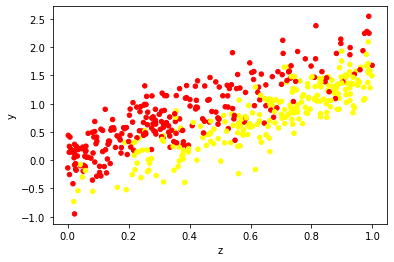

In [17]:
#Plotting Whole Data

ob_data_1.plot.scatter(x="z", y="y", c="x", cmap="autumn", colorbar=False);


# Task-5(A)

In [18]:
!pip install causalinference

In [19]:
!pip install dowhy

In [20]:
import pandas as pd
from dowhy import CausalModel
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/IHDP/csv/ihdp_npci_1.csv", header = None)

In [21]:
cols =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1" ,]
for i in range(1,26):
    cols.append("x"+str(i))
df.columns = cols
df = df.astype({"treatment":'bool'}, copy=False)
df.head()

,treatment,y_factual,y_cfactual,mu0,mu1,x1,x2,x3,x4,x5,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,True,5.599916,4.318780,3.268256,6.854457,-0.528603,-0.343455,1.128554,0.161703,-0.316603,...,1,1,1,1,0,0,0,0,0,0
1,False,6.875856,7.856495,6.636059,7.562718,-1.736945,-1.802002,0.383828,2.244320,-0.629189,...,1,1,1,1,0,0,0,0,0,0
2,False,2.996273,6.633952,1.570536,6.121617,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,...,1,0,1,1,0,0,0,0,0,0
3,False,1.366206,5.697239,1.244738,5.889125,0.390083,0.596582,-1.850350,-0.879606,-0.004017,...,1,0,1,1,0,0,0,0,0,0
4,False,1.963538,6.202582,1.685048,6.191994,-1.045229,-0.602710,0.011465,0.161703,0.683672,...,1,1,1,1,0,0,0,0,0,0


In [ ]:
!pip install statsmodels==0.13.2

In [22]:
# Declaration of causal model
# from causalinference import CausalModel
from dowhy import CausalModel



s = ""
for i in range(1,26):
    s += ("x"+str(i)+"+")


causeModel=CausalModel(
        data = df,
        treatment='treatment',
        outcome='y_factual',
        common_causes=s.split('+'),
)

# causeModel.view_model() 

                  

In [23]:
estimat= causeModel.identify_effect(proceed_when_unidentifiable=True)
print(estimat)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(y_factual|x2,x3,x1,x10,x15,x9,x21,x17,x24,x8,x4,x12,x
d[treatment]                                                                  

                                                 
14,x5,x6,x19,x11,x22,x13,x20,x25,x16,x7,x23,x18))
                                                 
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→y_factual then P(y_factual|treatment,x2,x3,x1,x10,x15,x9,x21,x17,x24,x8,x4,x12,x14,x5,x6,x19,x11,x22,x13,x20,x25,x16,x7,x23,x18,U) = P(y_factual|treatment,x2,x3,x1,x10,x15,x9,x21,x17,x24,x8,x4,x12,x14,x5,x6,x19,x11,x22,x13,x20,x25,x16,x7,x23,x18)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable found!



# Linear Regression

In [29]:
from dowhy.causal_estimator import CausalEstimate
from dowhy.causal_estimator import CausalEstimator
from dowhy.utils.api import parse_state

from importlib import import_module
import econml

est = causeModel.estimate_effect(estimat,
        method_name="backdoor.linear_regression", test_significance=True
)

print(est)

print("Causal Estimate is " + str(est.value))
data_first = df[df["treatment"]==1]
data_z = df[df["treatment"]==0]

print("ATE", np.mean(data_first["y_factual"])- np.mean(data_z["y_factual"]))


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(y_factual|x2,x3,x1,x10,x15,x9,x21,x17,x24,x8,x4,x12,x
d[treatment]                                                                  

                                                 
14,x5,x6,x19,x11,x22,x13,x20,x25,x16,x7,x23,x18))
                                                 
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→y_factual then P(y_factual|treatment,x2,x3,x1,x10,x15,x9,x21,x17,x24,x8,x4,x12,x14,x5,x6,x19,x11,x22,x13,x20,x25,x16,x7,x23,x18,U) = P(y_factual|treatment,x2,x3,x1,x10,x15,x9,x21,x17,x24,x8,x4,x12,x14,x5,x6,x19,x11,x22,x13,x20,x25,x16,x7,x23,x18)

## Realized estimand
b: y_factual~treatment+x2+x3+x1+x10+x15+x9+x21+x17+x24+x8+x4+x12+x14+x5+x6+x19+x11+x22+x13+x20+x25+x16+x7+x23+x18
Target units: ate

##

# Random Forest Regressor

In [33]:
identified_est_exp = causeModel.identify_effect(proceed_when_unidentifiable=True)

from sklearn.ensemble import RandomForestRegressor
metalearner_est = causeModel.estimate_effect(identified_est_exp, method_name="backdoor.econml.metalearners.TLearner",
confidence_intervals=False,
method_params={
     "init_params":{'models': RandomForestRegressor()},
     "fit_params":{}
              })
print(metalearner_est)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(y_factual|x2,x3,x1,x10,x15,x9,x21,x17,x24,x8,x4,x12,x
d[treatment]                                                                  

                                                 
14,x5,x6,x19,x11,x22,x13,x20,x25,x16,x7,x23,x18))
                                                 
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→y_factual then P(y_factual|treatment,x2,x3,x1,x10,x15,x9,x21,x17,x24,x8,x4,x12,x14,x5,x6,x19,x11,x22,x13,x20,x25,x16,x7,x23,x18,U) = P(y_factual|treatment,x2,x3,x1,x10,x15,x9,x21,x17,x24,x8,x4,x12,x14,x5,x6,x19,x11,x22,x13,x20,x25,x16,x7,x23,x18)

## Realized estimand
b: y_factual~treatment+x2+x3+x1+x10+x15+x9+x21+x17+x24+x8+x4+x12+x14+x5+x6+x19+x11+x22+x13+x20+x25+x16+x7+x23+x18
Target units: ate

##

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


(array([  2.,   6.,  13.,  20.,  30.,  99., 208., 261.,  88.,  20.]),
 array([-1.96383376, -1.09263455, -0.22143534,  0.64976388,  1.52096309,
         2.3921623 ,  3.26336151,  4.13456073,  5.00575994,  5.87695915,
         6.74815836]),
 <BarContainer object of 10 artists>)

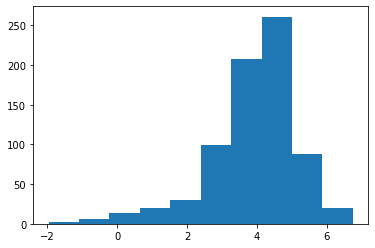

In [34]:
import matplotlib.pyplot as plt
plt.hist(metalearner_est.cate_estimates)